In [2]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import torchvision 
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim

In [4]:
trainset = torchvision.datasets.CIFAR10(root='./data',train = True, download = True, transform = transforms.ToTensor())

Files already downloaded and verified


In [5]:
print(type(trainset))

<class 'torchvision.datasets.cifar.CIFAR10'>


In [6]:
dataloader = torch.utils.data.DataLoader(trainset, batch_size = 4, shuffle = True)

In [7]:
print(type(dataloader))

<class 'torch.utils.data.dataloader.DataLoader'>


In [8]:
iterator = iter(dataloader)
images, labels = next(iter(iterator))
print(type(images))
print(images.shape)
print(images[0].shape)

<class 'torch.Tensor'>
torch.Size([4, 3, 32, 32])
torch.Size([3, 32, 32])


# **Visualising Data**

<class 'torch.Tensor'>
<class 'numpy.ndarray'>
(3, 32, 32)
(32, 32, 3)


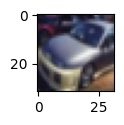

tensor(1)


In [9]:
imagesample = images[0]
print(type(imagesample))
npimg = imagesample.to('cpu').numpy()
print(type(npimg))
print(npimg.shape)
npimg = np.transpose(npimg,(1,2,0))
print(npimg.shape)
plt.figure(figsize = (1,1))
plt.imshow(npimg)
plt.show()
print(labels[0])

In [10]:
 classes = ('airplanes', 'cars', 'birds', 'cats', 'deer', 'dogs', 'frogs', 'horses', 'ships', 'trucks')

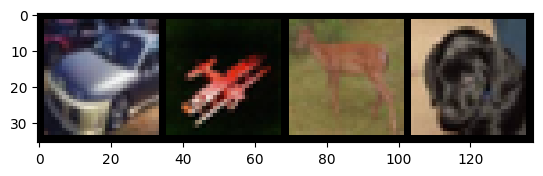

cars airplanes deer dogs


In [11]:
def imgshow(img):
    plt.imshow(np.transpose(img.to('cpu').numpy(),(1,2,0)))
    plt.show()
imgshow(torchvision.utils.make_grid(images))  
print(' '.join(classes[labels[i]] for i in range(4)))
    

# **Single Convolution layer**

In [13]:
class CNN(nn.Module):
    def __init__(self):
        super (CNN,self).__init__()
        self.conv1 = nn.Conv2d(3,16,3,padding=(1,1))
    def forward(self,x):
        out = self.conv1(x)
        return out
net = CNN()
out = net(images)
print(out.shape)

torch.Size([4, 16, 32, 32])


In [14]:
for i in net.parameters():
    print(i.shape)

torch.Size([16, 3, 3, 3])
torch.Size([16])


In [19]:
out1 = out[0 ,0, :, :].detach().numpy()
print(out1.shape)

(32, 32)


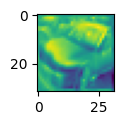

In [20]:
plt.figure(figsize=(1,1))
plt.imshow(out1)
plt.show()

# **Deep Convolution network**


torch.Size([4, 16, 28, 28])


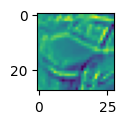

In [21]:
class CNN_v2(nn.Module):
    def __init__(self):
        super(CNN_v2,self).__init__()
        self.model = nn.Sequential(
                nn.Conv2d(3,8,3),
                nn.Conv2d(8,16,3)
        )
    def forward(self,x):
        x = self.model(x)
        return x
net = CNN_v2()
out = net(images)
print(out.shape)
plt.figure(figsize=(1,1))
plt.imshow(out[0,0,:,:].detach().numpy())
plt.show()

torch.Size([4, 16, 6, 6])


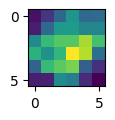

In [22]:
class CNN_v3(nn.Module):
    def __init__(self):
        super(CNN_v3,self).__init__()
        self.model = nn.Sequential(
                nn.Conv2d(3,8,3),              #(N,3,32,32)->(N,8,30,30)
                nn.AvgPool2d(2,stride=2),      #(N,8,30,30)->(N,8,15,15)
                nn.Conv2d(8,16,3),             #(N,8,15,15)->(N,16,13,13)
                nn.AvgPool2d(2,stride=2)       #(N,16,13,13)->(N,16,6,6)
        )
    def forward(self,x):
        x = self.model(x)
        return x
net = CNN_v3()
out = net(images)
print(out.shape)
plt.figure(figsize=(1,1))
plt.imshow(out[0,0,:,:].detach().numpy())
plt.show()        

# **LeNet**

In [23]:
device_gpu = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(torch.cuda.get_device_name())

NVIDIA GeForce MX550


In [24]:
images,labels = images.to(device_gpu), labels.to(device_gpu)

In [27]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet,self).__init__()
        self.cnnmodel = nn.Sequential(
                    nn.Conv2d(3,6,5),             #(N,3,32,32) -> (N,6,28,28)
                    nn.Tanh(),                    
                    nn.AvgPool2d(2,stride=2),     #(N,6,28,28) -> (N,6,14,14)
                    nn.Conv2d(6,16,5),            #(N,6,14,14) -> (N,16,10,10)
                    nn.Tanh(),
                    nn.AvgPool2d(2,stride=2)      #(N,16,10,10) -> (N,16,5,5)
        )
        self.fnnmodel = nn.Sequential(
                    nn.Linear(400,120),
                    nn.Tanh(),
                    nn.Linear(120,84),
                    nn.Tanh(),
                    nn.Linear(84,10)
        )
    def forward(self,x):
        x = self.cnnmodel(x)
        x = x.view(x.size(0),-1)
        x = self.fnnmodel(x)
        return x
net = LeNet().to(device_gpu)
out = net(images)
print(out.shape)
print(out)
maxvalues, predclass = torch.max(out.data,1)
print(predclass)

torch.Size([4, 10])
tensor([[ 0.0861, -0.0888, -0.0229, -0.0387, -0.1289,  0.0091,  0.0402, -0.0262,
          0.0116, -0.0251],
        [ 0.0877, -0.1328, -0.0018, -0.0458, -0.1283,  0.0338,  0.0404, -0.0309,
          0.0178, -0.0434],
        [ 0.0717, -0.0871, -0.0153, -0.0513, -0.1335,  0.0194,  0.0248, -0.0341,
          0.0250, -0.0467],
        [ 0.0741, -0.1007, -0.0174, -0.0543, -0.1377,  0.0320,  0.0228, -0.0310,
          0.0303, -0.0318]], device='cuda:0', grad_fn=<AddmmBackward0>)
tensor([0, 0, 0, 0], device='cuda:0')


In [33]:
testset = torchvision.datasets.CIFAR10(root='./data', train = False, download = True, transform= transforms.ToTensor())

Files already downloaded and verified


In [34]:
testloader = torch.utils.data.DataLoader(testset, batch_size=128, shuffle = False)
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 128, shuffle = True)

In [30]:
def evaluate(dataloader):
    total ,correct = 0,0
    for data in dataloader:
        images, labels = data
        images, labels = images.to(device_gpu),labels.to(device_gpu)
        outputs = net(images)
        total += labels.size(0)
        maxv, pred = torch.max(outputs.data,1)
        correct += (pred==labels).sum().item()
    return 100 * correct/total  

In [31]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters())

epoch: 0/5  testaccuracy: 43.700000 , trainaccuracy: 44.178000
epoch: 1/5  testaccuracy: 47.630000 , trainaccuracy: 48.420000
epoch: 2/5  testaccuracy: 50.390000 , trainaccuracy: 51.332000
epoch: 3/5  testaccuracy: 51.740000 , trainaccuracy: 53.532000
epoch: 4/5  testaccuracy: 53.370000 , trainaccuracy: 56.156000


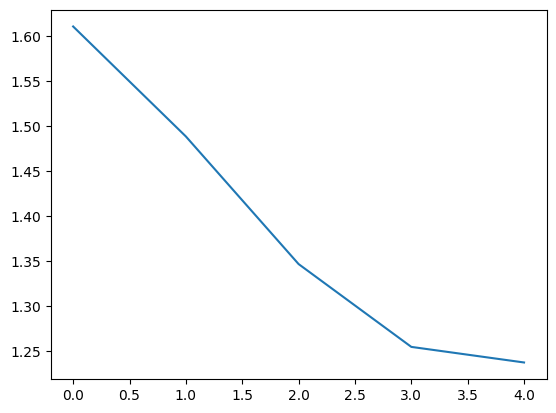

CPU times: total: 1min 4s
Wall time: 2min 37s


In [35]:
%%time
loss_arr = []
max_epochs = 5
for epoch in range(max_epochs):
    for i,data in enumerate(trainloader,0):
        images ,labels = data
        images ,labels = images.to(device_gpu),labels.to(device_gpu)
        optimizer.zero_grad()
        outputs = net(images)
        loss = loss_fn(outputs,labels)
        loss.backward()
        optimizer.step()
    loss_arr.append(loss.cpu().detach())
    print("epoch: %d/%d  testaccuracy: %f , trainaccuracy: %f" % (epoch,max_epochs,evaluate(testloader),evaluate(trainloader)))   
plt.plot(loss_arr)
plt.show()
        
    

# **Basic Visualization of internal layers**

In [36]:
iterator = iter(dataloader)
images, labels = next(iter(iterator))
net = net.to('cpu')
out = net(images)
print(out.shape)
out = net.cnnmodel[0:4](images)
print(out.shape)

torch.Size([4, 10])
torch.Size([4, 16, 10, 10])


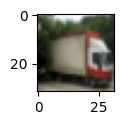

In [37]:
image_id = 2
plt.figure(figsize=(1,1))
plt.imshow(np.transpose(images[image_id].numpy(),(1,2,0)))
plt.show()

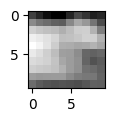

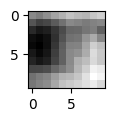

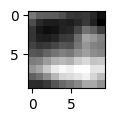

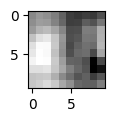

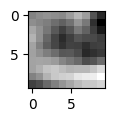

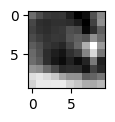

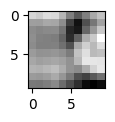

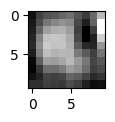

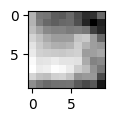

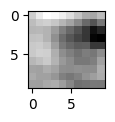

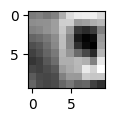

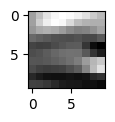

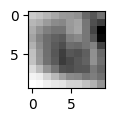

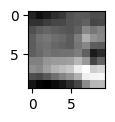

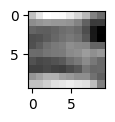

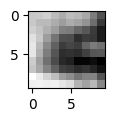

In [38]:
for i in range(16):
    plt.figure(figsize = (1,1))
    plt.imshow(out[image_id,i,:,:].detach().numpy(), cmap ='binary')
    plt.show()